**Importing all the necessary python packages**

Refer to [pycaret documentation](https://pycaret.readthedocs.io/en/latest/index.html) for help with installing pycaret.

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence

**Importing the data**

In [28]:
train = pd.read_csv('datasets/11_preprocess_5.csv', usecols = ['air_wt_real_ug', 'SMAP', 'RPM', 'CHT_K', 'MAT_K', 'TPS'])
train_RG = pd.read_csv('datasets/train_RG.csv', usecols = ['air_wt_real_ug', 'SMAP', 'RPM', 'CHT_K', 'MAT_K', 'TPS'])

**Separating the target variable from the input variables**

In [29]:
cy = np.corrcoef(train, rowvar=False)
print('correlation with the target variable')
print(cy)
target_col = 'air_wt_real_ug'
X = train.loc[:, train.columns != target_col]
y = train.loc[:, train.columns == target_col]
print(X)
print(y)

correlation with the target variable
[[ 1.00000000e+00  2.95534480e-01 -3.09325346e-01 -4.92304335e-02
  -3.27842671e-16 -1.53220012e-01]
 [ 2.95534480e-01  1.00000000e+00 -2.36930656e-01  5.04002384e-01
   7.49146805e-15  4.05795740e-01]
 [-3.09325346e-01 -2.36930656e-01  1.00000000e+00  3.88127046e-01
  -4.60169854e-15  5.09150053e-01]
 [-4.92304335e-02  5.04002384e-01  3.88127046e-01  1.00000000e+00
   5.61295715e-16  8.81440532e-01]
 [-3.27842671e-16  7.49146805e-15 -4.60169854e-15  5.61295715e-16
   1.00000000e+00  7.72956928e-14]
 [-1.53220012e-01  4.05795740e-01  5.09150053e-01  8.81440532e-01
   7.72956928e-14  1.00000000e+00]]
          SMAP          RPM   TPS   MAT_K   CHT_K
0    60.450563  2756.752308  0.08  279.15  299.15
1    60.864159  2732.974979  0.08  279.15  299.15
2    60.655428  2731.379416  0.08  279.15  299.15
3    60.616775  2735.145377  0.08  279.15  299.15
4    60.511121  2758.680519  0.08  279.15  299.15
..         ...          ...   ...     ...     ...
195  6

**Standardizing the input variables using Min-Max**

In [30]:
scaler = MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
X = scaler.transform(X)
print(X)
print(X.shape)
print(type(X))

MinMaxScaler()
[6.14027332e+01 3.25850777e+03 1.00000000e-01 2.79150000e+02
 3.02150000e+02]
[[0.22292226 0.08004588 0.         0.         0.        ]
 [0.56046262 0.03645084 0.         0.         0.        ]
 [0.39011535 0.03352542 0.         0.         0.        ]
 [0.35856953 0.0404302  0.         0.         0.        ]
 [0.27234409 0.0835812  0.         0.         0.        ]
 [0.26288069 0.09585354 0.         0.         0.        ]
 [0.33123033 0.15928433 0.         0.         0.        ]
 [0.27549931 0.15449618 0.         0.         0.        ]
 [0.3038897  0.07767774 0.         0.         0.        ]
 [0.4889592  0.14516454 0.         0.         0.        ]
 [0.4689804  0.1945974  0.         0.         0.        ]
 [0.41535175 0.20206674 0.         0.         0.        ]
 [0.29652869 0.21666499 0.         0.         0.        ]
 [0.41219736 0.23393179 0.         0.         0.        ]
 [0.47633997 0.23003325 0.         0.         0.        ]
 [0.43743356 0.31796152 0.         0.

**Checking multicollinearity using VIF**

In [31]:
names = ['SMAP', 'RPM', 'CHT_K', 'MAT_K', 'TPS']
X = pd.DataFrame(X, columns = names)
# X = X.drop(columns=['RPM', 'MAT_K'])

In [32]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

c:\users\sahil.adane\anaconda3\envs\conda-exp-env\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


SMAP       RPM      CHT_K  MAT_K        TPS
vif  4.563399  4.944071  14.207495    NaN  18.041058

In [33]:
print(X)
Z = sm.add_constant(X)
cc = np.corrcoef(X, rowvar=False)
print(cc)
VIF = np.linalg.inv(cc)
print(VIF)
VIF.diagonal() 

         SMAP       RPM  CHT_K  MAT_K  TPS
0    0.222922  0.080046    0.0    0.0  0.0
1    0.560463  0.036451    0.0    0.0  0.0
2    0.390115  0.033525    0.0    0.0  0.0
3    0.358570  0.040430    0.0    0.0  0.0
4    0.272344  0.083581    0.0    0.0  0.0
..        ...       ...    ...    ...  ...
195  0.654048  0.814150    1.0    0.0  1.0
196  0.444794  0.858113    1.0    0.0  1.0
197  0.544689  0.885425    1.0    0.0  1.0
198  0.362775  0.941112    1.0    0.0  1.0
199  0.386960  1.000000    1.0    0.0  1.0

[200 rows x 5 columns]
[[ 1.         -0.23693066  0.50400238         nan  0.40579574]
 [-0.23693066  1.          0.38812705         nan  0.50915005]
 [ 0.50400238  0.38812705  1.                 nan  0.88144053]
 [        nan         nan         nan         nan         nan]
 [ 0.40579574  0.50915005  0.88144053         nan  1.        ]]
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


c:\users\sahil.adane\anaconda3\envs\conda-exp-env\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\users\sahil.adane\anaconda3\envs\conda-exp-env\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([nan, nan, nan, nan, nan])

### Starting the fitting

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [35]:
X_train_constant = sm.add_constant(X_train)
print(X_train_constant)
print(Y_train)
model = sm.OLS(Y_train, X_train_constant)
results = model.fit()
print(results.params)
diagnostics = OLSInfluence(results)

     const      SMAP       RPM  CHT_K  MAT_K       TPS
81     1.0  0.491061  0.532621    0.5    0.0  0.666667
107    1.0  0.398526  0.717124    0.5    0.0  0.666667
112    1.0  0.470031  0.911454    0.5    0.0  0.666667
145    1.0  0.483700  0.918762    1.0    0.0  0.666667
8      1.0  0.303890  0.077678    0.0    0.0  0.000000
..     ...       ...       ...    ...    ...       ...
17     1.0  0.239747  0.400532    0.0    0.0  0.000000
98     1.0  0.332281  0.706484    0.5    0.0  0.666667
66     1.0  0.380652  0.334315    0.5    0.0  0.333333
126    1.0  0.637223  0.320748    0.5    0.0  0.666667
109    1.0  0.413249  0.753968    0.5    0.0  0.666667

[140 rows x 6 columns]
     air_wt_real_ug
81        65.480918
107       58.797960
112       58.195815
145       60.054729
8         59.615288
..              ...
17        61.441087
98        59.704796
66        58.776184
126       59.175490
109       58.401116

[140 rows x 1 columns]
const    58.262910
SMAP      5.268939
RPM      -0.65

In [36]:
print(results.summary())
print(diagnostics.cooks_distance)

                            OLS Regression Results                            
Dep. Variable:         air_wt_real_ug   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     6.961
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           4.00e-05
Time:                        10:48:24   Log-Likelihood:                -324.95
No. Observations:                 140   AIC:                             659.9
Df Residuals:                     135   BIC:                             674.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2629      1.012     57.577      0.0

c:\users\sahil.adane\anaconda3\envs\conda-exp-env\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [37]:
X_test = sm.add_constant(X_test)
print(np.shape(X_test))
Y_pred = results.predict(X_test)
print(np.shape(Y_pred))
print(np.shape(Y_test))

(60, 6)
(60,)
(60, 1)


In [38]:
residual = Y_test.T - Y_pred
print(np.shape(residual))

(1, 60)


In [39]:
print(np.shape(X_test))

(60, 6)


### Add autocorrelation check

c:\users\sahil.adane\anaconda3\envs\conda-exp-env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


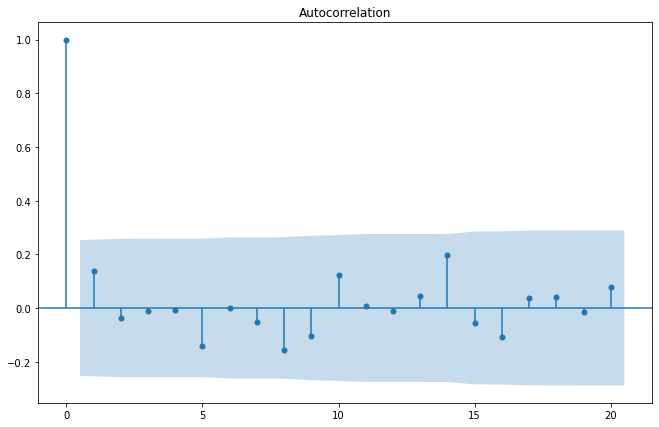

In [43]:
acf = smt.graphics.plot_acf(residual.T, lags=20 , alpha=0.05)
acf.show()